In [407]:
import pandas as pd
import seaborn as sea 
import matplotlib.pyplot as matplt
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
warnings.filterwarnings("ignore")

In [408]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [409]:
data.shape

(768, 9)

In [410]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [411]:
feature_var_raw = data.drop('Outcome',axis = 1)
target_var_raw = data['Outcome']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(feature_var_raw, target_var_raw, test_size=0.2, random_state=42)
model_pred_raw = Perceptron(max_iter = 1000, eta0 = 0.01, random_state = 42)

model_pred_raw.fit(X_train_raw, y_train_raw)

# Make predictions
y_prediction_raw = model_pred.predict(X_test_raw)

# Evaluate the model
accuracy_raw = accuracy_score(y_test_raw, y_prediction_raw)
print(classification_report(y_test_raw, y_prediction_raw))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.36      1.00      0.53        55

    accuracy                           0.36       154
   macro avg       0.18      0.50      0.26       154
weighted avg       0.13      0.36      0.19       154



In [398]:
clean_data = data.copy()
clean_data.loc[clean_data['Outcome']== 2,'Outcome'] = 1
avgBloodPressure=clean_data.loc[(clean_data['Outcome']==0,'BloodPressure')].mean()
clean_data.loc[clean_data['BloodPressure']==0,'BloodPressure'] = avgBloodPressure
avgSkinThickness=clean_data.loc[(clean_data['Outcome']==0,'SkinThickness')].mean()
clean_data.loc[clean_data['SkinThickness']==0,'SkinThickness'] = avgSkinThickness
avgInsulin=clean_data.loc[(clean_data['Outcome']==0,'Insulin')].mean()
clean_data.loc[clean_data['Insulin']==0,'Insulin'] = avgInsulin
avgBMI=clean_data.loc[(clean_data['Outcome']==0,'BMI')].mean()
clean_data.loc[clean_data['BMI']==0,'BMI'] = avgBMI
avgBloodPressure=clean_data.loc[(clean_data['Outcome']==1,'BloodPressure')].mean()
clean_data.loc[clean_data['BloodPressure']==0,'BloodPressure'] = avgBloodPressure
avgSkinThickness=clean_data.loc[(clean_data['Outcome']==1,'SkinThickness')].mean()
clean_data.loc[clean_data['SkinThickness']==0,'SkinThickness'] = avgSkinThickness
avgInsulin=clean_data.loc[(clean_data['Outcome']==1,'Insulin')].mean()
clean_data.loc[clean_data['Insulin']==0,'Insulin'] = avgInsulin
avgBMI=clean_data.loc[(clean_data['Outcome']==1,'BMI')].mean()
clean_data.loc[clean_data['BMI']==0,'BMI'] = avgBMI

clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000,68.792,33.6,0.627,50,1
1,1,85,66.0,29.000,68.792,26.6,0.351,31,0
2,8,183,64.0,19.664,68.792,23.3,0.672,32,1
3,1,89,66.0,23.000,94.000,28.1,0.167,21,0
4,0,137,40.0,35.000,168.000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000,180.000,32.9,0.171,63,0
764,2,122,70.0,27.000,68.792,36.8,0.340,27,0
765,5,121,72.0,23.000,112.000,26.2,0.245,30,0
766,1,126,60.0,19.664,68.792,30.1,0.349,47,1


In [399]:
# Function to detect and remove outliers based on IQR
def rmv_outliers(dataset):
    # For each column in the DataFrame
    outlier_indices = []
    for column in dataset.select_dtypes(include=['float64', 'int64']).columns:  # Apply only to numerical columns
        q1 = dataset[column].quantile(0.25)  # 25th percentile
        q3 = dataset[column].quantile(0.75)  # 75th percentile
        range = q3 - q1                   # Interquartile range

        # Define the bounds
        lwr_bnd = q1 - 1.5 * range
        upr_bnd = q3 + 1.5 * range
        outlier_indices += dataset[(dataset[column] < lwr_bnd) | (dataset[column] > upr_bnd)].index.tolist()
        
        # Filter the DataFrame to remove outliers
    outlier_indices = list(set(outlier_indices))
    dataset = dataset.drop(index=outlier_indices)
    return dataset

# Remove outliers from the dataset
data_clean = rmv_outliers(clean_data)
data_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000,68.792,33.6,0.627,50,1
1,1,85,66.0,29.000,68.792,26.6,0.351,31,0
2,8,183,64.0,19.664,68.792,23.3,0.672,32,1
3,1,89,66.0,23.000,94.000,28.1,0.167,21,0
5,5,116,74.0,19.664,68.792,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000,180.000,32.9,0.171,63,0
764,2,122,70.0,27.000,68.792,36.8,0.340,27,0
765,5,121,72.0,23.000,112.000,26.2,0.245,30,0
766,1,126,60.0,19.664,68.792,30.1,0.349,47,1


In [401]:
scaler = MinMaxScaler()
scale_data = scaler.fit_transform(data_clean)
scaled_data = pd.DataFrame(scale_data, columns = data_clean.columns)

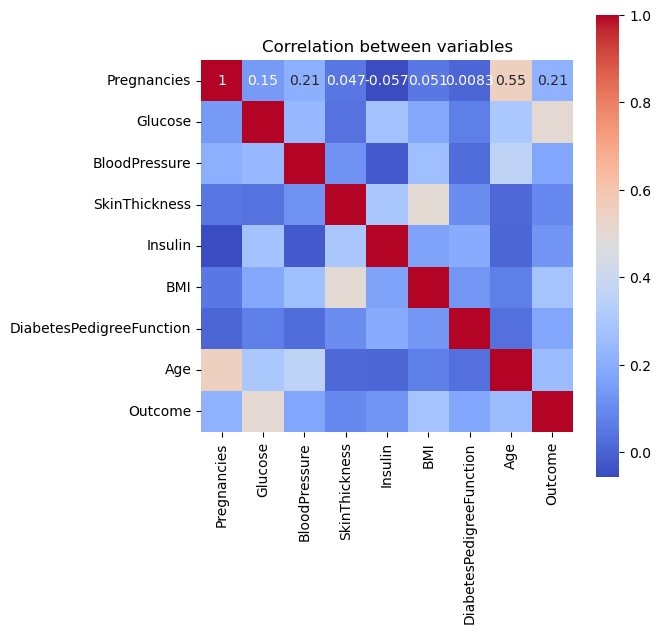

In [402]:
correlation_matrix = scaled_data.corr()
matplt.figure(figsize=(6, 6))
sea.heatmap(correlation_matrix , annot=True, cmap='coolwarm', square=True)
matplt.title('Correlation between variables')
matplt.show()

In [403]:
feature_var = scaled_data.drop('Outcome',axis = 1)
target_var = scaled_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(feature_var, target_var, test_size=0.2, random_state=42)
model_pred = Perceptron(max_iter = 1000, eta0 = 0.01, random_state = 42)

model_pred.fit(X_train, y_train)

# Make predictions
y_prediction = model_pred.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        93
         1.0       0.00      0.00      0.00        33

    accuracy                           0.74       126
   macro avg       0.37      0.50      0.42       126
weighted avg       0.54      0.74      0.63       126



In [413]:
#changing hyperparameters and checking again

model_pred_percp = Perceptron(max_iter = 2000, eta0=0.05, penalty='l2', alpha=0.0001, random_state=42)
model_pred_percp.fit(X_train, y_train)
y_pred_perceptron = model_pred_percp.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print(classification_report(y_test, y_pred_perceptron))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89        93
         1.0       0.80      0.48      0.60        33

    accuracy                           0.83       126
   macro avg       0.82      0.72      0.75       126
weighted avg       0.83      0.83      0.82       126

